In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Read datasets
objects_df = pd.read_csv("data/objects.csv")
people_df = pd.read_csv("data/people.csv")
relationships_df = pd.read_csv("data/relationships.csv")

In [7]:
# Merge datasets to get relationships between people and objects
merged_df = pd.merge(relationships_df, objects_df, left_on='relationship_object_id', right_on='id', how='inner')


In [15]:
# Get the company with the most relationships
top_company = merged_df['name'].value_counts().idxmax()
top_company

'Microsoft'

In [104]:
# Filter merged dataset to include only relationships involving the top company
filtered_df = merged_df[merged_df['name'] == 'Vodafone']
# Merge with people_df based on person_object_id and object_id
final_df = pd.merge(filtered_df, people_df, left_on='person_object_id', right_on='object_id', how='inner')


final_df.head()

,id_x,relationship_id,person_object_id,relationship_object_id,start_at,end_at,is_past,sequence,title,created_at_x,...,relationships,created_by,created_at_y,updated_at_y,id,object_id,first_name,last_name,birthplace,affiliation_name
0,12401,12401,p:10982,c:5471,2003-07-01,2008-07-01,1,4,CEO,2008-05-16 18:10:13,...,61,peter,2008-05-16 18:01:20,2010-02-02 18:16:17,9339,p:10982,Arun,Sarin,"Pachmari, Madhya Pradesh, India",Unaffiliated
1,319816,319816,p:10982,c:5471,1999-01-01,2008-01-01,1,3,Board Director,2013-07-22 10:43:40,...,61,peter,2008-05-16 18:01:20,2010-02-02 18:16:17,9339,p:10982,Arun,Sarin,"Pachmari, Madhya Pradesh, India",Unaffiliated
2,344330,344330,p:3762,c:5471,1997-01-01,1997-01-01,1,6,Internal Product Development & Unix (Sun Solar...,2013-08-10 04:45:57,...,61,peter,2008-05-16 18:01:20,2010-02-02 18:16:17,3108,p:3762,Kasian,Franks,NaN,Seeqpod
3,301947,301947,p:92521,c:5471,1996-01-01,1998-01-01,1,4,"Manager BSS, Test and Verification",2013-07-08 06:41:40,...,61,peter,2008-05-16 18:01:20,2010-02-02 18:16:17,81755,p:92521,Paul,Palmer,NaN,Unaffiliated
4,303890,303890,p:7078,c:5471,2001-01-01,2004-01-01,1,2,Global Product Manager,2013-07-09 13:30:17,...,61,peter,2008-05-16 18:01:20,2010-02-02 18:16:17,5916,p:7078,Alicia,Navarro,Sydney,Skimlinks


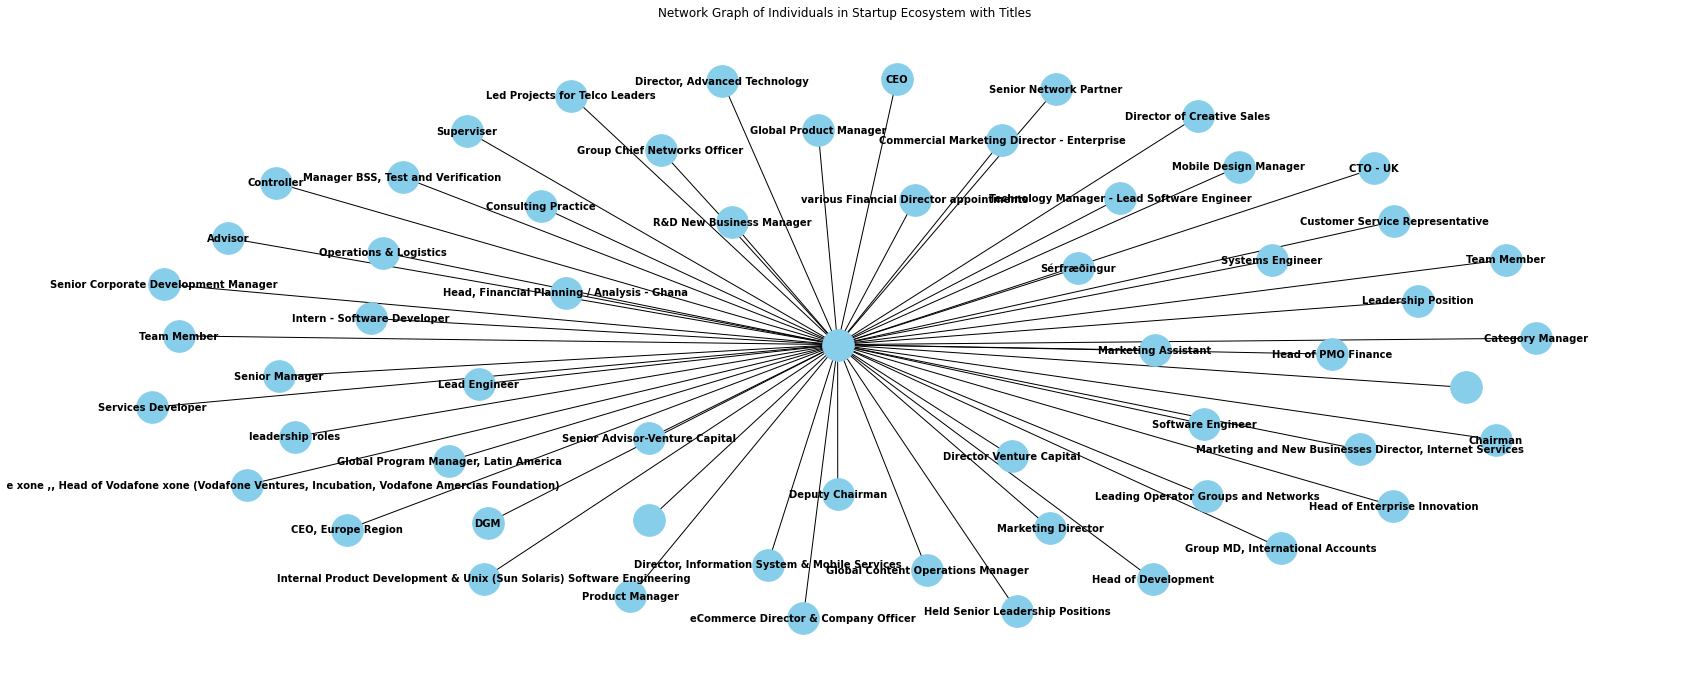

In [107]:
# Construct network graph
G = nx.from_pandas_edgelist(final_df, source='person_object_id', target='name')

# Draw the network graph with labels including titles
plt.figure(figsize=(30, 12))
# Position nodes using the spring layout algorithm
pos = nx.spring_layout(G, seed=42)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='skyblue')

# Draw edges
nx.draw_networkx_edges(G, pos)

# Create a dictionary to store labels for nodes
node_labels = {}
for node in G.nodes():
    # Check if the node has a corresponding title in the DataFrame
    if final_df.loc[final_df['person_object_id'] == node, 'title'].any():
        # Get the title for the node and add it to the labels dictionary
        title = final_df.loc[final_df['person_object_id'] == node, 'title'].iloc[0]
        node_labels[node] = title

# Draw networkx labels
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_weight='bold')

plt.title('Network Graph of Individuals in Startup Ecosystem for Vodafone')
plt.axis('off')  # Turn off the axis
plt.show()

In [108]:
# Filter merged dataset to include only relationships involving the top company
filtered_df = merged_df[merged_df['name'] == top_company]
# Merge with people_df based on person_object_id and object_id
final_df = pd.merge(filtered_df, people_df, left_on='person_object_id', right_on='object_id', how='inner')


final_df.head()

,id_x,relationship_id,person_object_id,relationship_object_id,start_at,end_at,is_past,sequence,title,created_at_x,...,relationships,created_by,created_at_y,updated_at_y,id,object_id,first_name,last_name,birthplace,affiliation_name
0,160246,160246,p:53322,c:1242,2012-03-01,NaN,0,8,Director of Microsoft Accelerator at Microsoft,2012-05-15 17:42:15,...,1189,initial-importer,2007-11-03 12:45:12,2013-03-13 06:01:23,47788,p:53322,Hanan,Lavy,NaN,United Parents Online Ltd
1,228341,228341,p:187938,c:1242,2008-01-01,2011-03-01,1,5,Corporate Vice President. Mobile,2013-05-06 13:33:42,...,1189,initial-importer,2007-11-03 12:45:12,2013-03-13 06:01:23,153548,p:187938,Todd,Peters,NaN,ArcSoft
2,222997,222997,p:186512,c:1242,2003-06-01,2006-06-01,1,2,Product Manager,2013-05-01 14:48:11,...,1189,initial-importer,2007-11-03 12:45:12,2013-03-13 06:01:23,152339,p:186512,Eric,Engineer,NaN,Invodo
3,223082,223082,p:18075,c:1242,2010-01-01,2012-01-01,1,4,Senior Product Manager - Bing,2013-05-01 15:29:54,...,1189,initial-importer,2007-11-03 12:45:12,2013-03-13 06:01:23,15659,p:18075,Pejman,Pour-Moezzi,NaN,Magoosh
4,223727,223727,p:66910,c:1242,1984-01-01,1985-01-01,1,1,Systems Software Engineer,2013-05-02 05:00:14,...,1189,initial-importer,2007-11-03 12:45:12,2013-03-13 06:01:23,59897,p:66910,John,Partridge,NaN,Unaffiliated


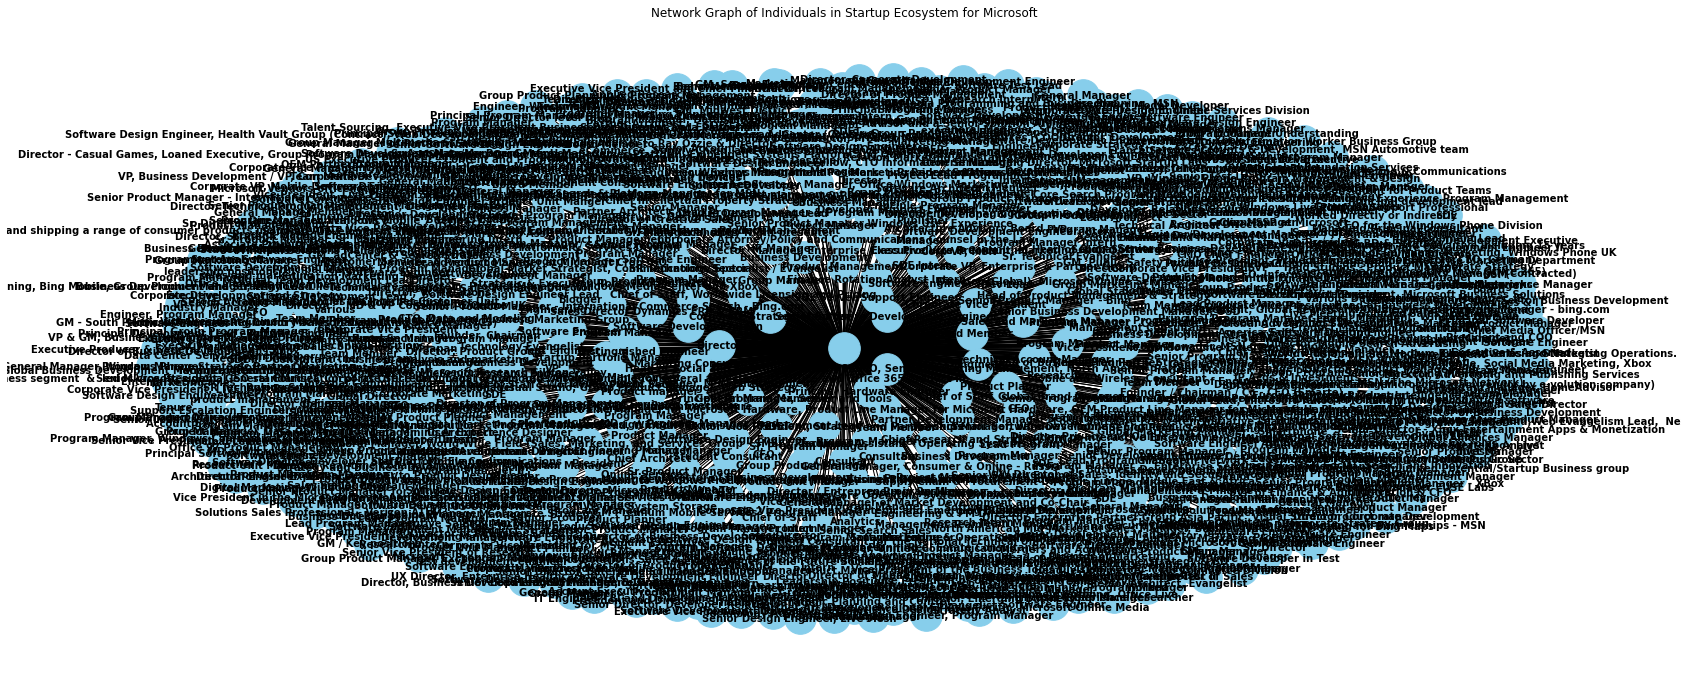

In [110]:
# Construct network graph
G = nx.from_pandas_edgelist(final_df, source='person_object_id', target='name')

# Draw the network graph with labels including titles
plt.figure(figsize=(30, 12))
# Position nodes using the spring layout algorithm
pos = nx.spring_layout(G, seed=42)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='skyblue')

# Draw edges
nx.draw_networkx_edges(G, pos)

# Create a dictionary to store labels for nodes
node_labels = {}
for node in G.nodes():
    # Check if the node has a corresponding title in the DataFrame
    if final_df.loc[final_df['person_object_id'] == node, 'title'].any():
        # Get the title for the node and add it to the labels dictionary
        title = final_df.loc[final_df['person_object_id'] == node, 'title'].iloc[0]
        node_labels[node] = title

# Draw networkx labels
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_weight='bold')

plt.title('Network Graph of Individuals in Startup Ecosystem for Microsoft')
plt.axis('off')  # Turn off the axis
plt.show()